<a href="https://colab.research.google.com/github/omkarthorat9279/Laptop-Price-Prediction-system/blob/main/Laptop_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 131543: invalid continuation byte
# when we get this error, try assigning the encoding format to latin

In [5]:
df=pd.read_csv("/content/drive/MyDrive/Datasets/laptop_price.csv",encoding='latin-1')
df.head(100)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,97,Acer,Spin 5,2 in 1 Convertible,13.3,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows 10,1.5kg,847.00
96,98,Dell,Inspiron 3567,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,AMD Radeon R5 M430,Linux,2.2kg,599.90
97,99,Dell,Inspiron 3567,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,4GB,256GB SSD,AMD Radeon R5 M430,Linux,2.2kg,485.00
98,100,Asus,X541UV-DM1439T (i3-7100U/6GB/256GB/GeForce,Notebook,15.6,Full HD 1920x1080,Intel Core i3 7100U 2.4GHz,6GB,256GB SSD,Nvidia GeForce 920M,Windows 10,2kg,577.00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [ ]:
df.drop(columns=['laptop_ID'],inplace=True)

In [ ]:
df.isnull().sum()

Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

In [ ]:
df.duplicated().sum()

28

In [ ]:
df.drop_duplicates(inplace=True,ignore_index=True)

In [ ]:
df

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...
1270,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00
1271,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00
1272,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00
1273,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00


In [ ]:
df['Price_euros']

0       1339.69
1        898.94
2        575.00
3       2537.45
4       1803.60
         ...   
1270     638.00
1271    1499.00
1272     229.00
1273     764.00
1274     369.00
Name: Price_euros, Length: 1275, dtype: float64

In [ ]:
df['Price']=(df['Price_euros']*87.91).astype('int')
# Price converted from Euros to INR

In [ ]:
df.drop(columns=['Price_euros'],inplace=True)

In [ ]:
df.sample(2)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
730,Acer,Predator 17,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,16GB,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,4.2kg,170105
334,Asus,FX553VD-FY647T (i7-7700HQ/8GB/256GB/GeForce,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8GB,256GB SSD,Nvidia GeForce GTX 1050,Windows 10,2.5kg,87822


In [ ]:
# EDA and data cleaning and preprocessing
# For every column, we will clean it, perform preprocessing and then perform Univariate analysis
# and then perform bivariate analysis of that column with respect to Output column(Price column)

In [ ]:
# Company
df['Company'].value_counts()

Dell         291
Lenovo       289
HP           268
Asus         152
Acer         101
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: Company, dtype: int64

In [ ]:
9+7+7+6+4+4+3+3+3+3+2

51

<Axes: >

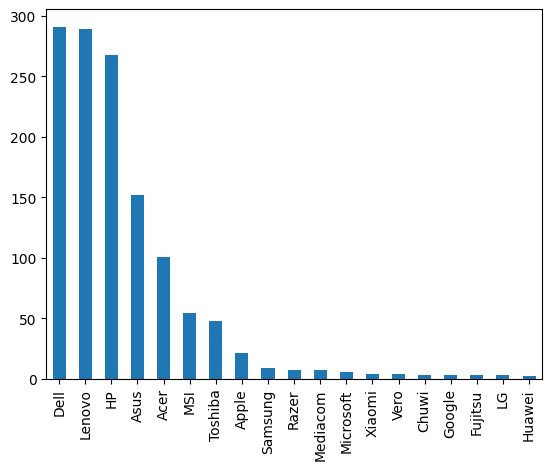

In [ ]:
df['Company'].value_counts().plot(kind='bar')

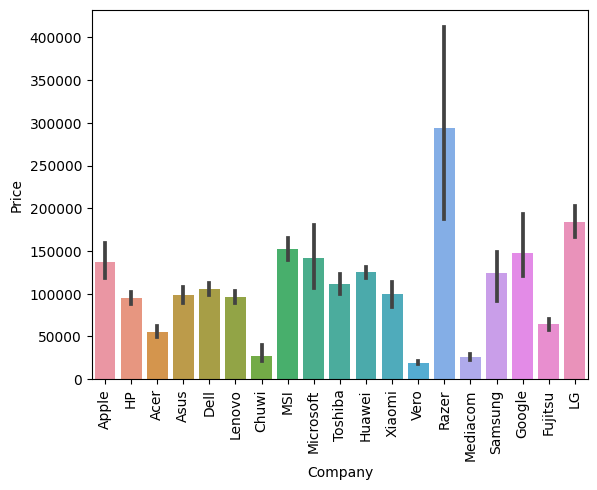

In [ ]:
sns.barplot(x=df['Company'],y=df['Price'])
plt.xticks(rotation=90)
plt.show()

In [ ]:
df=df[df.groupby('Company').Company.transform('count')>20].copy()

In [ ]:
df.sample(5)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
1035,HP,EliteBook 820,Ultrabook,12.5,Full HD 1920x1080,Intel Core i7 6500U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,1.26kg,118590
398,Dell,Precision M5520,Workstation,15.6,4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 7700HQ 2.8GHz,8GB,256GB SSD,Nvidia Quadro M1200,Windows 10,1.78kg,238411
964,HP,ProBook 450,Notebook,15.6,1366x768,Intel Core i5 7200U 2.50GHz,8GB,1TB HDD,Nvidia GeForce 930MX,Windows 10,2.04kg,74415
1221,MSI,GP62MVR 6RF,Gaming,15.6,Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,8GB,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,2.2kg,129764
605,MSI,GS63VR 7RF,Gaming,15.6,4K Ultra HD 3840x2160,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 2TB HDD,Nvidia GeForce GTX 1060,Windows 10,1.8kg,202105


In [ ]:
df.shape

(1224, 12)

In [ ]:
1275-1224

51

<Axes: >

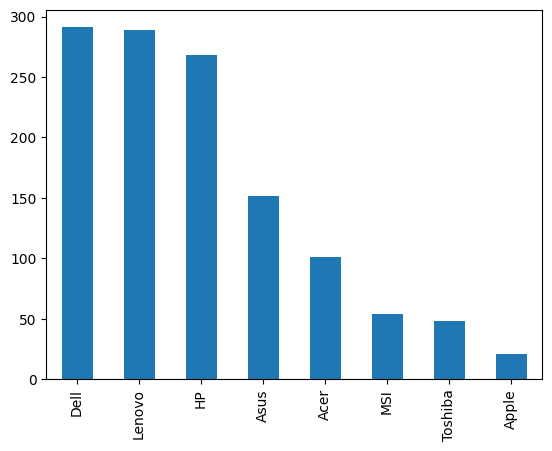

In [ ]:
df['Company'].value_counts().plot(kind='bar')

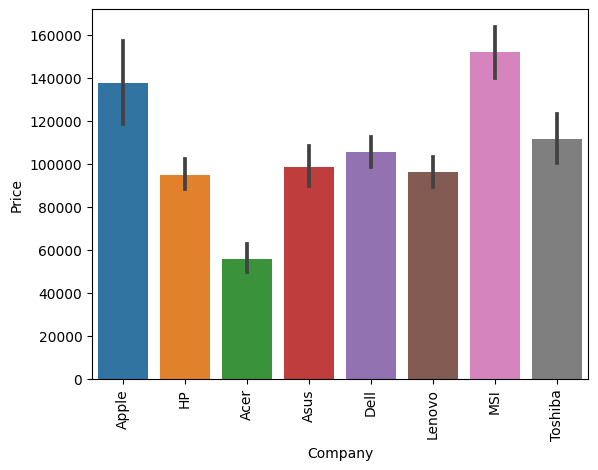

In [ ]:
sns.barplot(x=df['Company'],y=df['Price'])
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Product

In [ ]:
df['Product'].value_counts()

XPS 13                                 30
Inspiron 3567                          25
250 G6                                 21
Legion Y520-15IKBN                     19
Vostro 3568                            19
                                       ..
Ideapad 520-15IKBR                      1
Thinkpad X260                           1
Rog G752VL-UH71T                        1
Portege X30-D-10L                       1
X553SA-XX031T (N3050/4GB/500GB/W10)     1
Name: Product, Length: 589, dtype: int64

In [ ]:
df.drop(columns=['Product'],inplace=True)

In [ ]:
df.sample(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
473,Dell,Ultrabook,13.3,Full HD / Touchscreen 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows 10,1.42kg,161917
1047,MSI,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 6820HK 2.7GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 980M,Windows 10,3.78kg,135877


In [ ]:
df['TypeName'].value_counts()

Notebook              688
Gaming                200
Ultrabook             171
2 in 1 Convertible    114
Workstation            29
Netbook                22
Name: TypeName, dtype: int64

<Axes: >

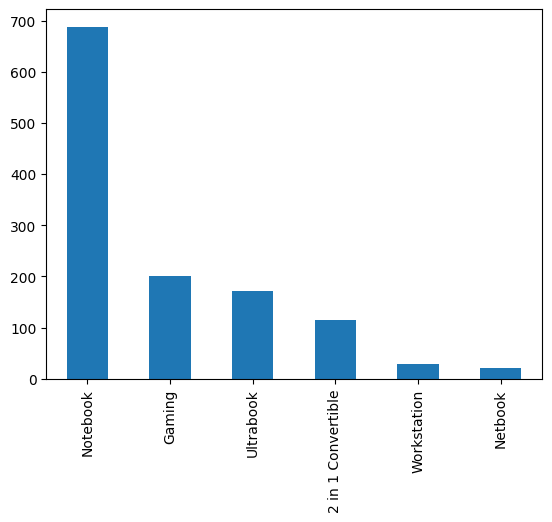

In [ ]:
df['TypeName'].value_counts().plot(kind='bar')

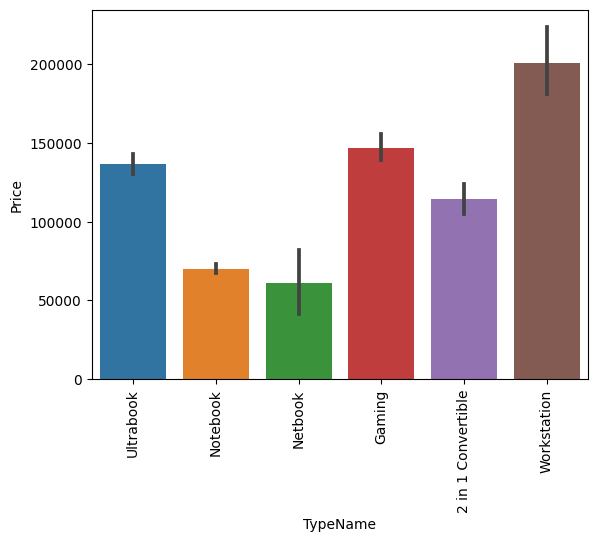

In [ ]:
sns.barplot(x=df['TypeName'],y=df['Price'])
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Inches
df['Inches'].value_counts()

15.6    637
14.0    182
17.3    162
13.3    152
12.5     37
11.6     29
12.0      6
13.9      6
15.4      4
10.1      4
18.4      1
17.0      1
14.1      1
11.3      1
15.0      1
Name: Inches, dtype: int64

<Axes: >

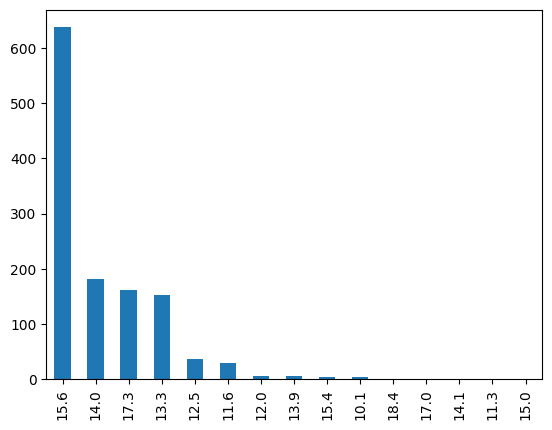

In [ ]:
df['Inches'].value_counts().plot(kind='bar')

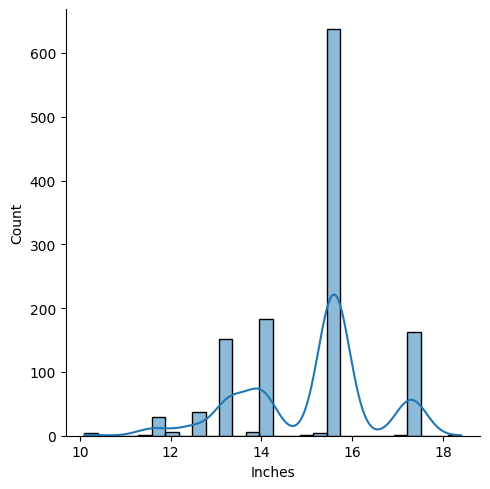

In [ ]:
sns.displot(df['Inches'],kde=True)

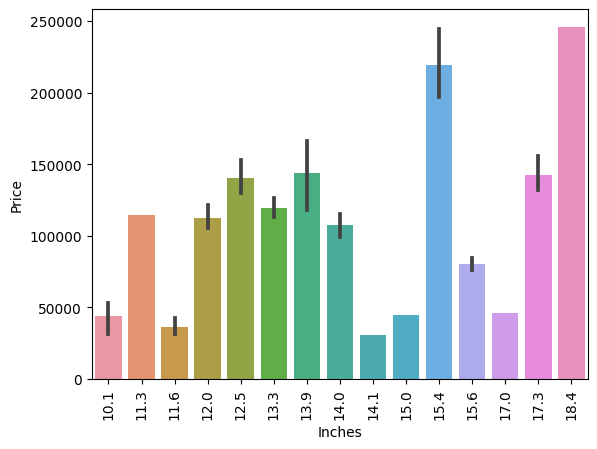

In [ ]:
sns.barplot(x=df['Inches'],y=df['Price'])
plt.xticks(rotation=90)
plt.show()

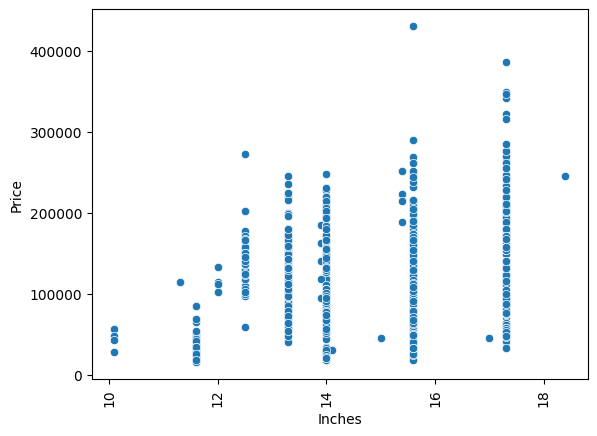

In [ ]:
sns.scatterplot(x=df['Inches'],y=df['Price'])
plt.xticks(rotation=90)
plt.show()

In [ ]:
df['ScreenResolution'].value_counts()

Full HD 1920x1080                                492
1366x768                                         258
IPS Panel Full HD 1920x1080                      217
IPS Panel Full HD / Touchscreen 1920x1080         48
Full HD / Touchscreen 1920x1080                   45
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     10
4K Ultra HD / Touchscreen 3840x2160                8
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
IPS Panel Touchscreen 2560x1440                    5
IPS Panel Touchscreen 1920x1200                    4
1440x900                                      

In [ ]:
# X_res
# Y_res
# Touchscreen
# IPS panel

In [ ]:
a="IPS Panel 4K Ultra HD / Touchscreen 3840x2160"

In [ ]:
a

'IPS Panel 4K Ultra HD / Touchscreen 3840x2160'

In [ ]:
a.split()

['IPS', 'Panel', '4K', 'Ultra', 'HD', '/', 'Touchscreen', '3840x2160']

In [ ]:
a.split()[-1]

'3840x2160'

In [ ]:
a.split()[-1].split('x')

['3840', '2160']

In [ ]:
a.split()[-1].split('x')[0]

'3840'

In [ ]:
a.split()[-1].split('x')[1]

'2160'

In [ ]:
(lambda a:a.split()[-1].split('x')[0])(a)

'3840'

In [ ]:
df['ScreenResolution'].apply(lambda a:a.split()[-1].split('x')[0])

0       2560
1       1440
2       1920
3       2880
4       2560
        ... 
1270    1920
1271    3200
1272    1366
1273    1366
1274    1366
Name: ScreenResolution, Length: 1224, dtype: object

In [ ]:
df['X_res']=df['ScreenResolution'].apply(lambda a:a.split()[-1].split('x')[0]).astype('int')
df['Y_res']=df['ScreenResolution'].apply(lambda a:a.split()[-1].split('x')[1]).astype('int')

In [ ]:
a="IPS Panel 4K Ultra HD / Touchscreen 3840x2160"

In [ ]:
(lambda a:1 if "Touchscreen" in a else 0)(a)

1

In [ ]:
df['Touchscreen']=df['ScreenResolution'].apply(lambda a:1 if "Touchscreen" in a else 0)
df['IPS']=df['ScreenResolution'].apply(lambda a:1 if "IPS" in a else 0)

In [ ]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,X_res,Y_res,Touchscreen,IPS
929,HP,Notebook,14.0,1366x768,Intel Core i5 6200U 2.3GHz,4GB,500GB HDD,Intel HD Graphics 520,Windows 10,1.95kg,101008,1366,768,0,0
734,Lenovo,Notebook,13.3,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.44kg,84393,1920,1080,0,1
1268,HP,Netbook,11.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,2GB,32GB Flash Storage,Intel HD Graphics 400,Windows 10,1.17kg,18373,1366,768,0,0
1263,Acer,Notebook,15.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4GB,500GB HDD,Intel HD Graphics 400,Linux,2.4kg,25405,1366,768,0,0
252,Asus,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4GB,1TB HDD,AMD Radeon R5 M420,Windows 10,1.68kg,41229,1366,768,0,0


In [ ]:
df.drop(columns=['ScreenResolution'],inplace=True)

In [ ]:
df.sample(5)

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,X_res,Y_res,Touchscreen,IPS
1271,Lenovo,2 in 1 Convertible,13.3,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,131777,3200,1800,1,1
1097,MSI,Gaming,17.3,Intel Core i7 6700HQ 2.6GHz,8GB,256GB SSD,Nvidia GeForce GTX 965M,Windows 10,2.6kg,140568,1920,1080,0,0
1039,HP,Notebook,14.0,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.64kg,88833,1920,1080,0,0
766,Asus,Notebook,17.3,Intel Pentium Quad Core N4200 1.1GHz,4GB,1TB HDD,Nvidia GeForce 920MX,Windows 10,2.8kg,41347,1366,768,0,0
527,Lenovo,Notebook,15.6,Intel Core i3 6006U 2GHz,8GB,2TB HDD,Nvidia GeForce 920MX,No OS,2.2kg,40350,1366,768,0,0


In [ ]:
df['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz     183
Intel Core i7 7700HQ 2.8GHz    142
Intel Core i7 7500U 2.7GHz     124
Intel Core i7 8550U 1.8GHz      71
Intel Core i5 8250U 1.6GHz      71
                              ... 
AMD E-Series E2-9000 2.2GHz      1
Intel Core M M3-6Y30 0.9GHz      1
Intel Core i5 2.9GHz             1
Intel Atom x5-Z8350 1.44GHz      1
AMD A9-Series 9410 2.9GHz        1
Name: Cpu, Length: 111, dtype: int64

In [ ]:
a="Intel Core i5 7200U 2.5GHz"

In [ ]:
a.split()

['Intel', 'Core', 'i5', '7200U', '2.5GHz']

In [ ]:
a.split()[0:3]

['Intel', 'Core', 'i5']

In [ ]:
" ".join(a.split()[0:3])

'Intel Core i5'

In [ ]:
(lambda a:" ".join(a.split()[0:3]))(a)

'Intel Core i5'

In [ ]:
df['Cpu']=df['Cpu'].apply(lambda a:" ".join(a.split()[0:3]))

In [ ]:
df['Cpu'].value_counts()

Intel Core i7               493
Intel Core i5               411
Intel Core i3               134
Intel Celeron Dual           66
Intel Pentium Quad           27
Intel Core M                 16
AMD A9-Series 9420           12
AMD A6-Series 9220            8
AMD A12-Series 9720P          7
Intel Celeron Quad            5
Intel Atom x5-Z8550           4
AMD A8-Series 7410            4
Intel Pentium Dual            3
AMD Ryzen 1700                3
AMD A9-Series A9-9420         2
AMD A10-Series 9600P          2
Intel Xeon E3-1535M           2
AMD E-Series 7110             2
AMD A10-Series 9620P          2
AMD A6-Series A6-9220         2
AMD A10-Series A10-9620P      2
Intel Xeon E3-1505M           2
AMD E-Series E2-9000e         2
AMD E-Series 9000e            1
AMD Ryzen 1600                1
AMD E-Series 6110             1
AMD FX 9830P                  1
AMD E-Series E2-6110          1
AMD E-Series E2-9000          1
AMD A6-Series 7310            1
Intel Atom x5-Z8350           1
AMD A12-

In [ ]:
def fetch_processor_name(text):
    if text=="Intel Core i7" or text=="Intel Core i5" or text=="Intel Core i3" or text=="Intel Core M":
        return text
    elif text.split()[0]=="Intel":
        return " ".join(text.split()[0:2])
    elif text.split()[0]=="AMD":
        if text[4]=="A":
            return "AMD A-Series"
        elif text[4]=="E":
            return "AMD E-Series"
        elif text[4]=="F":
            return "AMD F-Series"
        elif text[4]=="R":
            return "AMD Ryzen Series"
        else:
            return "Other AMD Processor"
    else:
        return "Other Processor"

In [ ]:
df['CPU']=df['Cpu'].apply(fetch_processor_name)

In [ ]:
df['CPU'].value_counts()

Intel Core i7       493
Intel Core i5       411
Intel Core i3       134
Intel Celeron        71
AMD A-Series         45
Intel Pentium        30
Intel Core M         16
AMD E-Series          9
Intel Atom            5
AMD Ryzen Series      4
Intel Xeon            4
AMD F-Series          2
Name: CPU, dtype: int64

In [ ]:
df.drop(columns=['Cpu'],inplace=True)

In [ ]:
df.sample(2)

,Company,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price,X_res,Y_res,Touchscreen,IPS,CPU
976,Lenovo,Notebook,14.0,4GB,508GB Hybrid,Intel HD Graphics 520,Windows 7,1.70kg,88085,1366,768,0,0,Intel Core i5
197,HP,Notebook,13.3,8GB,512GB SSD,Intel UHD Graphics 620,Windows 10,1.49kg,84305,1920,1080,0,0,Intel Core i5


<Axes: >

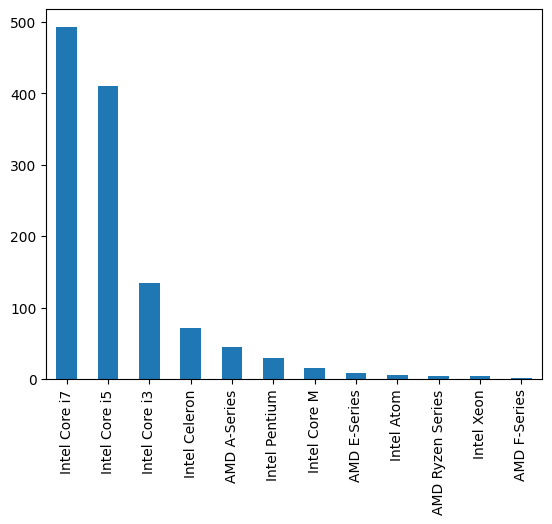

In [ ]:
df['CPU'].value_counts().plot(kind='bar')

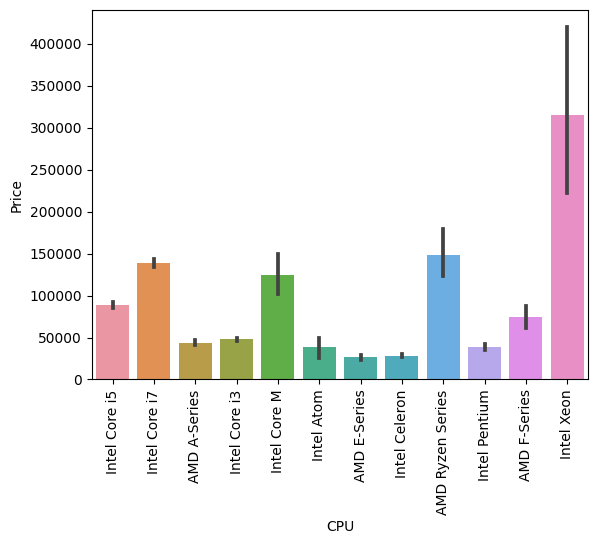

In [ ]:
sns.barplot(x=df['CPU'],y=df['Price'])
plt.xticks(rotation=90)
plt.show()

In [ ]:
df['Ram']

0        8GB
1        8GB
2        8GB
3       16GB
4        8GB
        ... 
1270     4GB
1271    16GB
1272     2GB
1273     6GB
1274     4GB
Name: Ram, Length: 1224, dtype: object

In [ ]:
df['Ram']=df['Ram'].apply(lambda x:x.replace("GB","")).astype('int')

In [ ]:
df['Ram']

0        8
1        8
2        8
3       16
4        8
        ..
1270     4
1271    16
1272     2
1273     6
1274     4
Name: Ram, Length: 1224, dtype: int64

In [ ]:
df['Ram'].value_counts()

8     595
4     351
16    186
6      34
12     25
32     15
2      14
24      3
64      1
Name: Ram, dtype: int64

<Axes: >

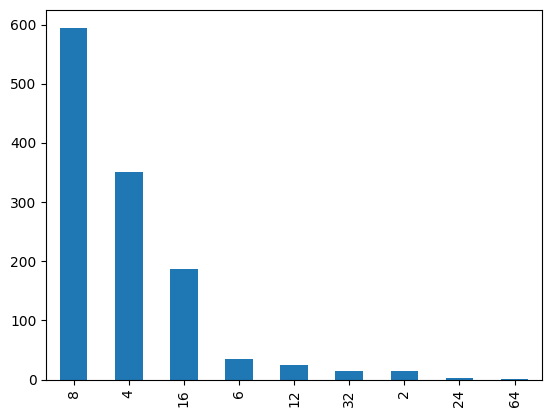

In [ ]:
df['Ram'].value_counts().plot(kind='bar')

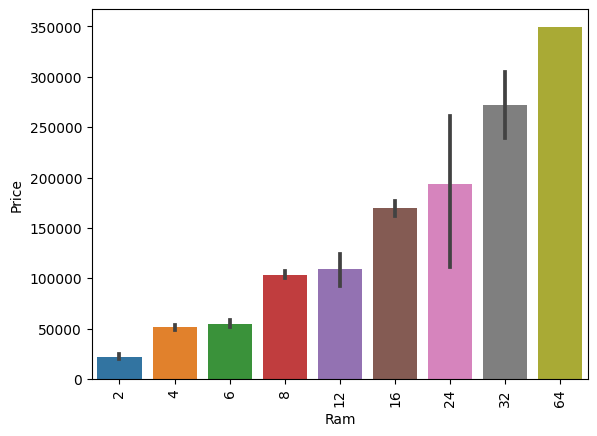

In [ ]:
sns.barplot(x=df['Ram'],y=df['Price'])
plt.xticks(rotation=90)
plt.show()

In [ ]:
df['Gpu'].value_counts()

Intel HD Graphics 620      265
Intel HD Graphics 520      179
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     65
Nvidia GeForce GTX 1060     45
                          ... 
Intel Graphics 620           1
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
Nvidia GeForce 960M          1
Name: Gpu, Length: 108, dtype: int64

In [ ]:
df['Gpu']=df['Gpu'].apply(lambda x:x.split()[0])

In [ ]:
df['Gpu'].value_counts()

Intel     666
Nvidia    385
AMD       173
Name: Gpu, dtype: int64

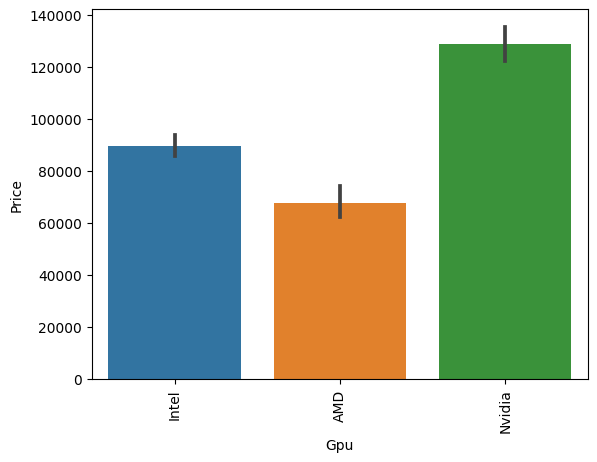

In [ ]:
sns.barplot(x=df['Gpu'],y=df['Price'])
plt.xticks(rotation=90)
plt.show()

In [ ]:
df['OpSys'].value_counts()

Windows 10      1011
No OS             63
Linux             58
Windows 7         45
Chrome OS         22
macOS             13
Mac OS X           8
Android            2
Windows 10 S       2
Name: OpSys, dtype: int64

In [ ]:
def os(text):
    if text=="Windows 10" or text=="Windows 10 S":
        return "Windows 10"
    elif text=="macOS" or text=="Mac OS X":
        return "Mac OS"
    elif text=="Windows 7":
        return text
    elif text=="No OS":
        return text
    else:
        return "Linux/Android/Chrome OS"

In [ ]:
df['OpSys']=df['OpSys'].apply(os)

In [ ]:
df['OpSys'].value_counts()

Windows 10                 1013
Linux/Android/Chrome OS      82
No OS                        63
Windows 7                    45
Mac OS                       21
Name: OpSys, dtype: int64

<Axes: >

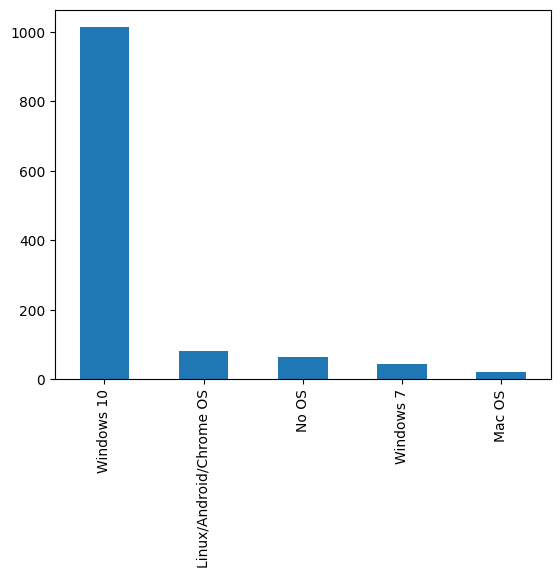

In [ ]:
df['OpSys'].value_counts().plot(kind='bar')

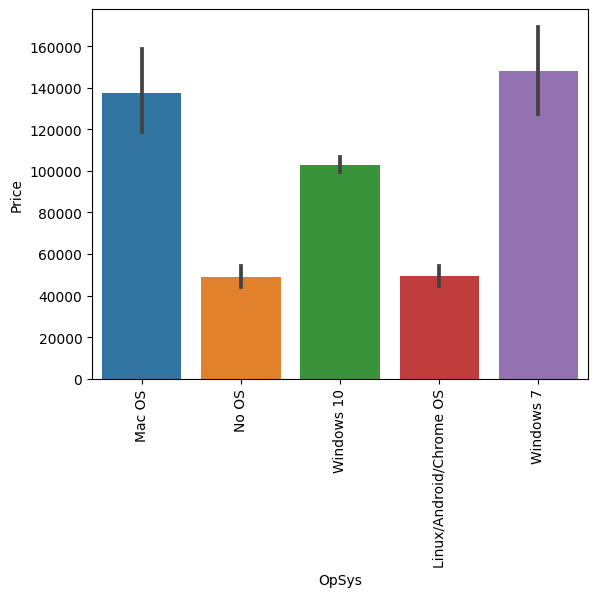

In [ ]:
sns.barplot(x=df['OpSys'],y=df['Price'])
plt.xticks(rotation=90)
plt.show()

In [ ]:
df['Weight']

0       1.37kg
1       1.34kg
2       1.86kg
3       1.83kg
4       1.37kg
         ...  
1270     1.8kg
1271     1.3kg
1272     1.5kg
1273    2.19kg
1274     2.2kg
Name: Weight, Length: 1224, dtype: object

In [ ]:
df['Weight']=df['Weight'].apply(lambda x:x.replace("kg","")).astype('float')

In [ ]:
df['Weight'].describe()

count    1224.000000
mean        2.063204
std         0.663863
min         0.690000
25%         1.597500
50%         2.060000
75%         2.320000
max         4.700000
Name: Weight, dtype: float64

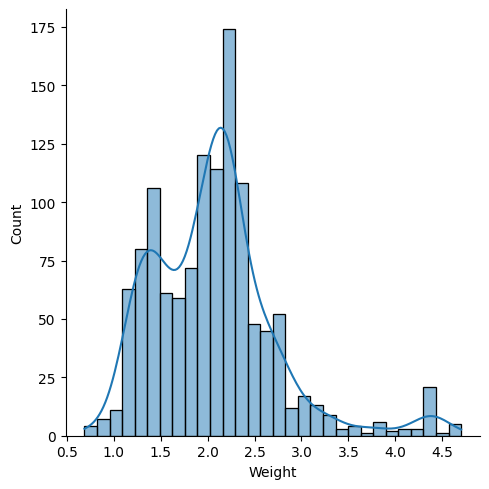

In [ ]:
sns.displot(x=df['Weight'],kde=True)
plt.show()

<Axes: xlabel='Weight', ylabel='Price'>

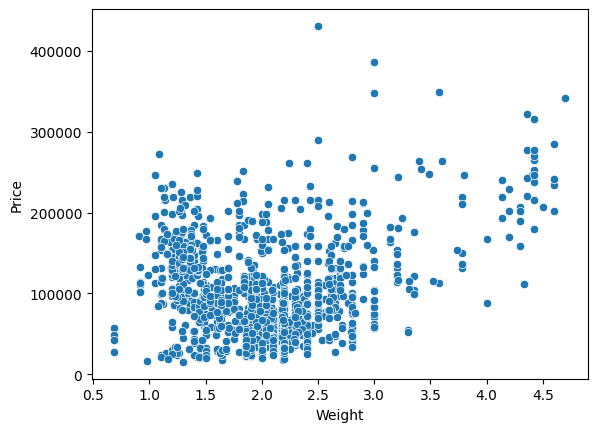

In [ ]:
sns.scatterplot(x=df['Weight'],y=df['Price'])

In [ ]:
# Memory

In [ ]:
df['Memory'].value_counts()

256GB SSD                        393
1TB HDD                          214
500GB HDD                        124
512GB SSD                        105
128GB SSD +  1TB HDD              93
256GB SSD +  1TB HDD              73
128GB SSD                         71
32GB Flash Storage                29
2TB HDD                           16
512GB SSD +  1TB HDD              14
1TB SSD                           12
64GB Flash Storage                10
256GB SSD +  2TB HDD              10
256GB Flash Storage                8
1.0TB Hybrid                       7
16GB Flash Storage                 6
180GB SSD                          5
128GB Flash Storage                4
16GB SSD                           3
512GB SSD +  2TB HDD               3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
32GB SSD                           2
256GB SSD +  256GB SSD             2
512GB SSD +  512GB SSD             1
5

In [ ]:
# SSD
# HDD
# Hybrid
# Flash Storage

In [ ]:
df['Memory']=df['Memory'].astype(str).replace("\.0","",regex=True)

In [ ]:
df['Memory'].value_counts()

256GB SSD                        393
1TB HDD                          215
500GB HDD                        124
512GB SSD                        105
128GB SSD +  1TB HDD              93
256GB SSD +  1TB HDD              73
128GB SSD                         71
32GB Flash Storage                29
2TB HDD                           16
512GB SSD +  1TB HDD              14
1TB SSD                           12
64GB Flash Storage                10
256GB SSD +  2TB HDD              10
256GB Flash Storage                8
1TB Hybrid                         7
16GB Flash Storage                 6
180GB SSD                          5
128GB Flash Storage                4
16GB SSD                           3
512GB SSD +  2TB HDD               3
1TB SSD +  1TB HDD                 2
512GB Flash Storage                2
128GB SSD +  2TB HDD               2
256GB SSD +  500GB HDD             2
256GB SSD +  256GB SSD             2
32GB SSD                           2
128GB HDD                          1
5

In [ ]:
df['Memory']=df['Memory'].str.replace("TB","000")
df['Memory']=df['Memory'].str.replace("GB","")

In [ ]:
df['Memory'].value_counts()

256 SSD                         393
1000 HDD                        215
500 HDD                         124
512 SSD                         105
128 SSD +  1000 HDD              93
256 SSD +  1000 HDD              73
128 SSD                          71
32 Flash Storage                 29
2000 HDD                         16
512 SSD +  1000 HDD              14
1000 SSD                         12
64 Flash Storage                 10
256 SSD +  2000 HDD              10
256 Flash Storage                 8
1000 Hybrid                       7
16 Flash Storage                  6
180 SSD                           5
128 Flash Storage                 4
16 SSD                            3
512 SSD +  2000 HDD               3
1000 SSD +  1000 HDD              2
512 Flash Storage                 2
128 SSD +  2000 HDD               2
256 SSD +  500 HDD                2
256 SSD +  256 SSD                2
32 SSD                            2
128 HDD                           1
512 SSD +  1000 Hybrid      

In [ ]:
new=df['Memory'].str.split('+',n=1,expand=True)
df['first']=new[0]
df['first']=df['first'].str.strip()
df['second']=new[1]

df['Layer1HDD']=df['first'].apply(lambda x:1 if "HDD" in x else 0)
df['Layer1SSD']=df['first'].apply(lambda x:1 if "SSD" in x else 0)
df['Layer1Hybrid']=df['first'].apply(lambda x:1 if "Hybrid" in x else 0)
df['Layer1Flash_Storage']=df['first'].apply(lambda x:1 if "Flash Storage" in x else 0)

df['first']=df['first'].str.replace(r'\D','',regex=True)

df['second'].fillna("0",inplace=True)

df['second']=df['second'].str.strip()
df['Layer2HDD']=df['second'].apply(lambda x:1 if "HDD" in x else 0)
df['Layer2SSD']=df['second'].apply(lambda x:1 if "SSD" in x else 0)
df['Layer2Hybrid']=df['second'].apply(lambda x:1 if "Hybrid" in x else 0)
df['Layer2Flash_Storage']=df['second'].apply(lambda x:1 if "Flash Storage" in x else 0)

df['second']=df['second'].str.replace(r'\D','',regex=True)

df['first']=df['first'].astype('int')
df['second']=df['second'].astype('int')

df['HDD']=df['first']*df['Layer1HDD']+df['second']*df['Layer2HDD']
df['SSD']=df['first']*df['Layer1SSD']+df['second']*df['Layer2SSD']
df['Hybrid']=df['first']*df['Layer1Hybrid']+df['second']*df['Layer2Hybrid']
df['Flash_Storage']=df['first']*df['Layer1Flash_Storage']+df['second']*df['Layer2Flash_Storage']

df.drop(columns=['first','second','Layer1HDD','Layer1SSD','Layer1Hybrid','Layer1Flash_Storage',
                 'Layer2HDD','Layer2SSD','Layer2Hybrid','Layer2Flash_Storage'],inplace=True)

In [ ]:
df.sample(5)

,Company,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price,X_res,Y_res,Touchscreen,IPS,CPU,HDD,SSD,Hybrid,Flash_Storage
1209,Asus,Gaming,15.6,16,256 SSD + 1000 HDD,Nvidia,Windows 10,2.20,215291,1920,1080,0,0,Intel Core i7,1000,256,0,0
119,Asus,Notebook,15.6,8,256 SSD,Nvidia,Windows 10,1.70,98283,1920,1080,0,0,Intel Core i7,0,256,0,0
932,HP,Notebook,15.6,4,1000 HDD,Intel,No OS,1.86,25397,1366,768,0,0,Intel Celeron,1000,0,0,0
446,Acer,Notebook,15.6,4,500 HDD,Intel,Linux/Android/Chrome OS,2.40,38838,1366,768,0,0,Intel Core i5,500,0,0,0
914,Acer,Notebook,15.6,4,1000 HDD,Intel,Windows 10,2.40,43867,1920,1080,0,0,Intel Core i3,1000,0,0,0


In [ ]:
df.drop(columns=['Memory'],inplace=True)

In [ ]:
df.sample(3)

,Company,TypeName,Inches,Ram,Gpu,OpSys,Weight,Price,X_res,Y_res,Touchscreen,IPS,CPU,HDD,SSD,Hybrid,Flash_Storage
669,Acer,Notebook,15.6,4,Intel,Linux/Android/Chrome OS,2.10,36218,1366,768,0,0,Intel Core i3,0,128,0,0
155,HP,Notebook,15.6,6,AMD,Windows 10,1.91,54416,1920,1080,0,0,Intel Core i5,0,256,0,0
1070,Dell,Notebook,15.6,4,Intel,Windows 10,2.06,42370,1366,768,0,0,Intel Core i3,500,0,0,0


In [ ]:
df.corr(numeric_only=True)

,Inches,Ram,Weight,Price,X_res,Y_res,Touchscreen,IPS,HDD,SSD,Hybrid,Flash_Storage
Inches,1.000000,0.239155,0.824959,0.055330,-0.057739,-0.071772,-0.359497,-0.104090,0.525077,-0.114322,0.050989,-0.230659
Ram,0.239155,1.000000,0.394187,0.726639,0.415731,0.412278,0.094037,0.223322,0.106175,0.589636,0.052774,-0.047725
Weight,0.824959,0.394187,1.000000,0.212038,-0.025155,-0.036765,-0.291506,0.038753,0.503765,-0.063144,0.105129,-0.178962
Price,0.055330,0.726639,0.212038,1.000000,0.553707,0.552964,0.161443,0.289226,-0.093770,0.654751,0.025523,-0.023384
X_res,-0.057739,0.415731,-0.025155,0.553707,1.000000,0.997454,0.320954,0.283969,-0.109044,0.523882,-0.000097,-0.013602
Y_res,-0.071772,0.412278,-0.036765,0.552964,0.997454,1.000000,0.317174,0.294360,-0.115936,0.518090,-0.000967,0.020131
Touchscreen,-0.359497,0.094037,-0.291506,0.161443,0.320954,0.317174,1.000000,0.154500,-0.195492,0.240469,-0.035892,-0.012073
IPS,-0.104090,0.223322,0.038753,0.289226,0.283969,0.294360,0.154500,1.000000,-0.087397,0.228186,-0.013349,0.074771
HDD,0.525077,0.106175,0.503765,-0.093770,-0.109044,-0.115936,-0.195492,-0.087397,1.000000,-0.407685,-0.073848,-0.112475
SSD,-0.114322,0.589636,-0.063144,0.654751,0.523882,0.518090,0.240469,0.228186,-0.407685,1.000000,-0.050250,-0.140474


<Axes: >

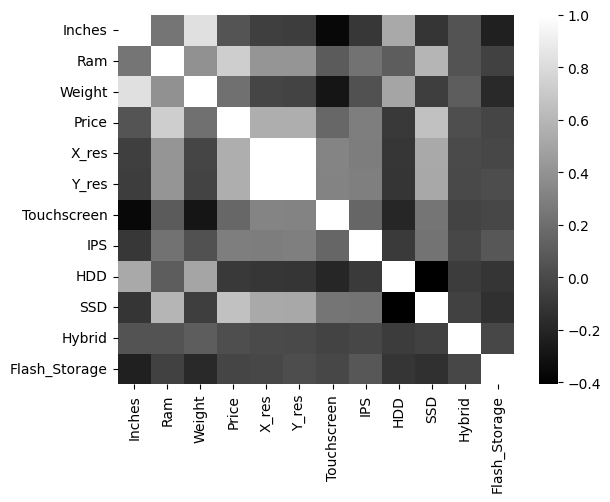

In [ ]:
sns.heatmap(df.corr(numeric_only=True),cmap='gray')

In [ ]:
df.corr(numeric_only=True)['Price']

Inches           0.055330
Ram              0.726639
Weight           0.212038
Price            1.000000
X_res            0.553707
Y_res            0.552964
Touchscreen      0.161443
IPS              0.289226
HDD             -0.093770
SSD              0.654751
Hybrid           0.025523
Flash_Storage   -0.023384
Name: Price, dtype: float64

In [ ]:
df.drop(columns=['Hybrid','Flash_Storage'],inplace=True)

In [ ]:
df.sample(2)

,Company,TypeName,Inches,Ram,Gpu,OpSys,Weight,Price,X_res,Y_res,Touchscreen,IPS,CPU,HDD,SSD
535,Dell,Notebook,15.6,8,Nvidia,Windows 10,1.93,120348,1920,1080,0,0,Intel Core i7,0,256
572,HP,Notebook,15.6,6,AMD,Windows 10,1.95,57053,1920,1080,0,1,AMD A-Series,0,256


In [ ]:
df['HDD'].value_counts()

0       667
1000    398
500     126
2000     32
128       1
Name: HDD, dtype: int64

<Axes: >

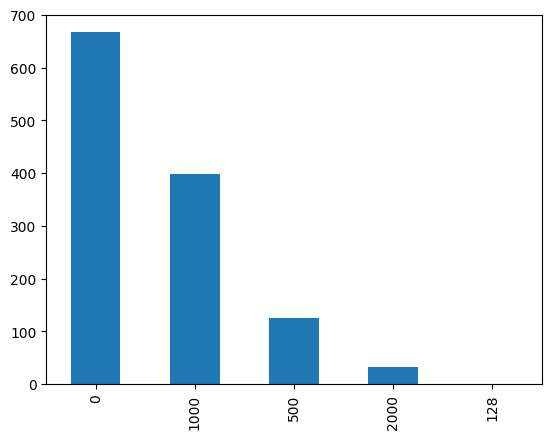

In [ ]:
df['HDD'].value_counts().plot(kind='bar')

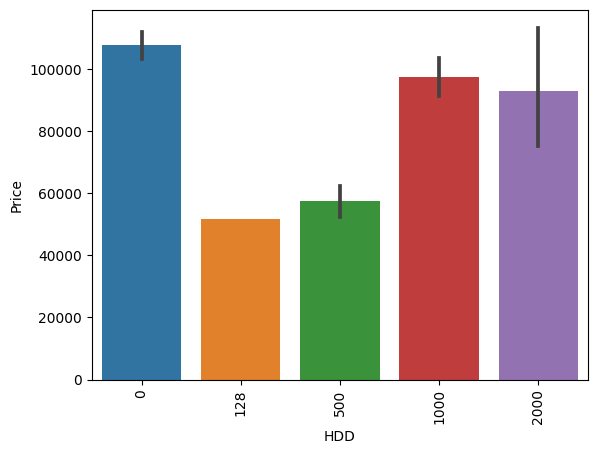

In [ ]:
sns.barplot(x=df['HDD'],y=df['Price'])
plt.xticks(rotation=90)
plt.show()

In [ ]:
df['SSD'].value_counts()

256     479
0       425
128     166
512     125
1000     14
180       5
16        3
32        2
64        1
1024      1
768       1
240       1
8         1
Name: SSD, dtype: int64

<Axes: >

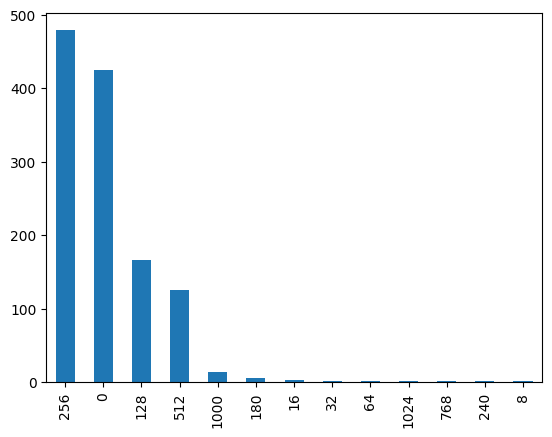

In [ ]:
df['SSD'].value_counts().plot(kind='bar')

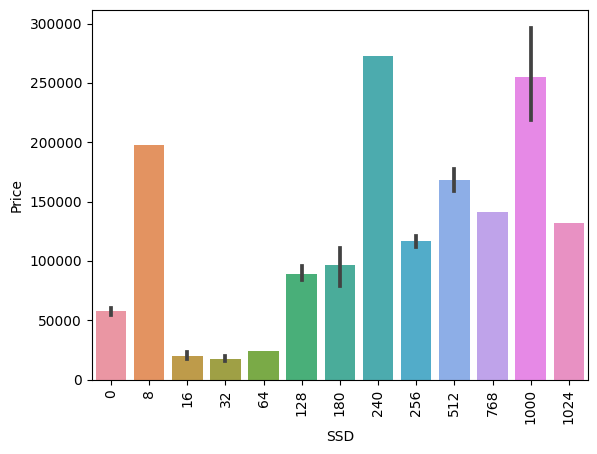

In [ ]:
sns.barplot(x=df['SSD'],y=df['Price'])
plt.xticks(rotation=90)
plt.show()

In [ ]:
df.corr(numeric_only=True)['Price']

Inches         0.055330
Ram            0.726639
Weight         0.212038
Price          1.000000
X_res          0.553707
Y_res          0.552964
Touchscreen    0.161443
IPS            0.289226
HDD           -0.093770
SSD            0.654751
Name: Price, dtype: float64

In [ ]:
# X_res: number of pixels placed on the screen horizontally
# Y_res: number of pixels placed on the screen vertically
# screen size
# Pixel Density(ppi)

In [ ]:
df['PPI']=((df['X_res']**2)+(df['Y_res']**2))**0.5/df['Inches']
df['PPI']=round(df['PPI'],2)

In [ ]:
df.sample(15)

,Company,TypeName,Inches,Ram,Gpu,OpSys,Weight,Price,X_res,Y_res,Touchscreen,IPS,CPU,HDD,SSD,PPI
822,Lenovo,Ultrabook,14.0,8,Intel,Windows 10,1.13,219687,1920,1080,0,1,Intel Core i7,0,512,157.35
92,HP,Notebook,13.3,16,Intel,Windows 10,1.49,105228,1920,1080,0,0,Intel Core i7,0,512,165.63
376,Lenovo,Netbook,11.6,4,Intel,Windows 10,1.59,48614,1366,768,0,1,Intel Celeron,0,128,135.09
853,Lenovo,Ultrabook,14.0,8,Nvidia,Windows 10,1.96,167292,1920,1080,0,1,Intel Core i7,0,256,157.35
814,Dell,Notebook,15.6,8,AMD,Windows 10,2.18,69432,1920,1080,0,0,Intel Core i5,0,256,141.21
105,HP,Notebook,14.0,6,Nvidia,Windows 10,1.58,57932,1920,1080,0,1,Intel Core i5,0,256,157.35
988,Dell,Notebook,15.6,8,AMD,Windows 10,2.36,65844,1366,768,0,0,Intel Core i7,1000,0,100.45
12,Apple,Ultrabook,15.4,16,AMD,Mac OS,1.83,214497,2880,1800,0,1,Intel Core i7,0,256,220.53
582,HP,Notebook,13.3,4,Intel,Windows 10,1.49,63207,1920,1080,0,0,Intel Core i3,0,128,165.63
237,Asus,Notebook,15.6,4,AMD,Windows 10,2.20,50548,1920,1080,0,0,AMD A-Series,1000,128,141.21


In [ ]:
df.corr(numeric_only=True)['Price']

Inches         0.055330
Ram            0.726639
Weight         0.212038
Price          1.000000
X_res          0.553707
Y_res          0.552964
Touchscreen    0.161443
IPS            0.289226
HDD           -0.093770
SSD            0.654751
PPI            0.483787
Name: Price, dtype: float64

In [ ]:
df.drop(columns=['X_res','Y_res','Inches'],inplace=True)

In [ ]:
df.sample(3)

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,CPU,HDD,SSD,PPI
925,Dell,Notebook,4,Intel,Windows 10,1.95,64165,0,0,Intel Core i5,500,0,100.45
479,Toshiba,Notebook,8,Intel,Windows 10,1.05,146985,0,1,Intel Core i5,0,256,165.63
1181,Lenovo,Ultrabook,6,Nvidia,Windows 10,1.54,73053,0,0,Intel Core i7,0,256,141.21


In [ ]:
df['Touchscreen'].value_counts()

0    1055
1     169
Name: Touchscreen, dtype: int64

<Axes: >

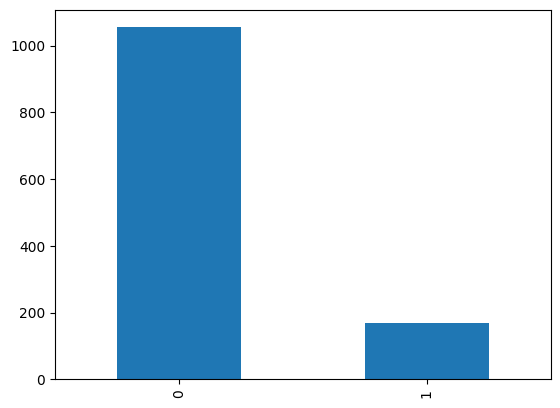

In [ ]:
df['Touchscreen'].value_counts().plot(kind='bar')

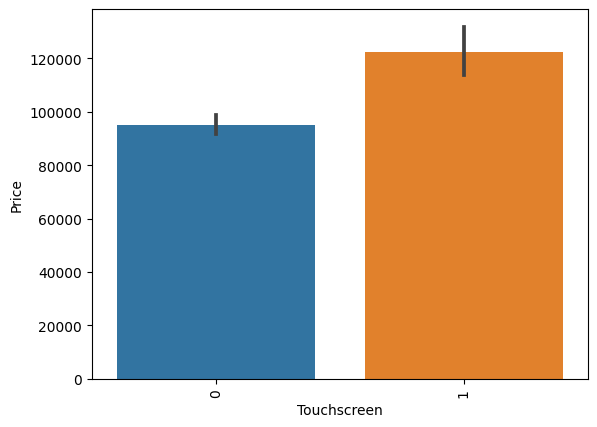

In [ ]:
sns.barplot(x=df['Touchscreen'],y=df['Price'])
plt.xticks(rotation=90)
plt.show()

In [ ]:
df['IPS'].value_counts()

0    885
1    339
Name: IPS, dtype: int64

<Axes: >

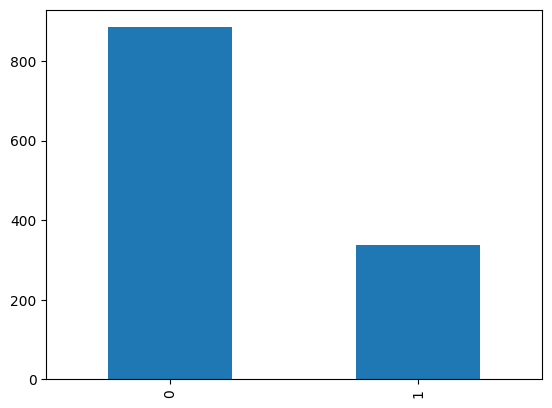

In [ ]:
df['IPS'].value_counts().plot(kind='bar')

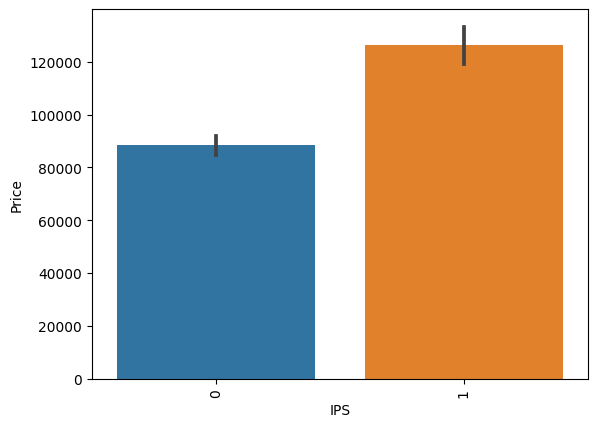

In [ ]:
sns.barplot(x=df['IPS'],y=df['Price'])
plt.xticks(rotation=90)
plt.show()

In [ ]:
df['PPI'].value_counts()

141.21    419
100.45    195
127.34    131
157.35    122
165.63    100
111.94     42
135.09     28
176.23     25
276.05     25
282.42     23
106.11     22
209.80     18
125.37      9
117.83      8
331.26      7
226.98      6
226.42      6
254.67      5
127.68      4
224.17      4
158.48      4
220.53      4
169.78      2
220.84      2
316.97      2
352.47      2
90.58       2
119.72      1
189.91      1
107.99      1
111.14      1
194.95      1
234.98      1
146.86      1
Name: PPI, dtype: int64

In [ ]:
df['PPI'].describe()

count    1224.000000
mean      145.675874
std        42.045198
min        90.580000
25%       127.340000
50%       141.210000
75%       157.350000
max       352.470000
Name: PPI, dtype: float64

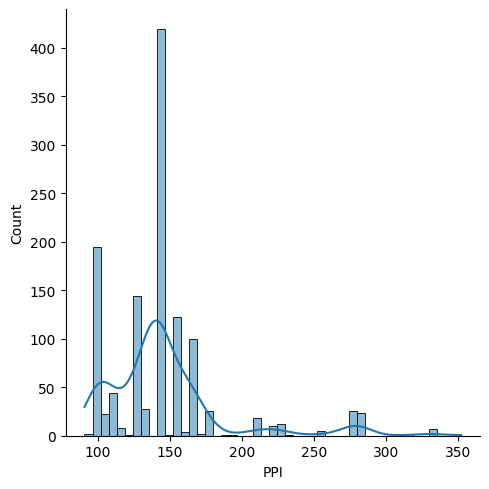

In [ ]:
sns.displot(x=df['PPI'],kde=True)

<Axes: xlabel='PPI', ylabel='Price'>

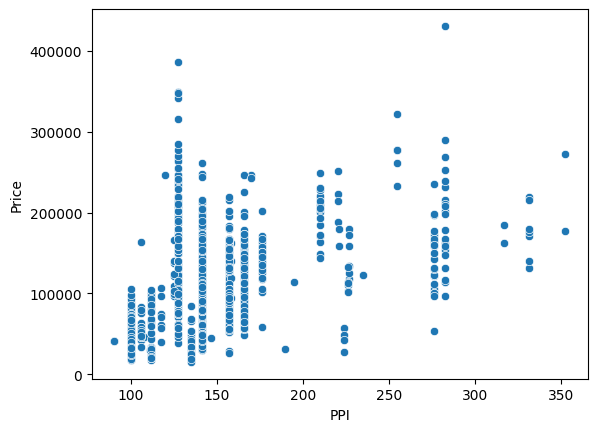

In [ ]:
sns.scatterplot(x=df['PPI'],y=df['Price'])

In [ ]:
df.sample(3)

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,CPU,HDD,SSD,PPI
1257,Dell,Notebook,4,Intel,Windows 10,2.29,43075,0,0,Intel Core i3,500,0,100.45
1242,Acer,Notebook,4,Intel,Linux/Android/Chrome OS,2.40,31805,0,0,Intel Core i3,500,0,100.45
1268,HP,Netbook,2,Intel,Windows 10,1.17,18373,0,0,Intel Celeron,0,0,135.09


In [ ]:
df.corr(numeric_only=True)['Price']

Ram            0.726639
Weight         0.212038
Price          1.000000
Touchscreen    0.161443
IPS            0.289226
HDD           -0.093770
SSD            0.654751
PPI            0.483787
Name: Price, dtype: float64

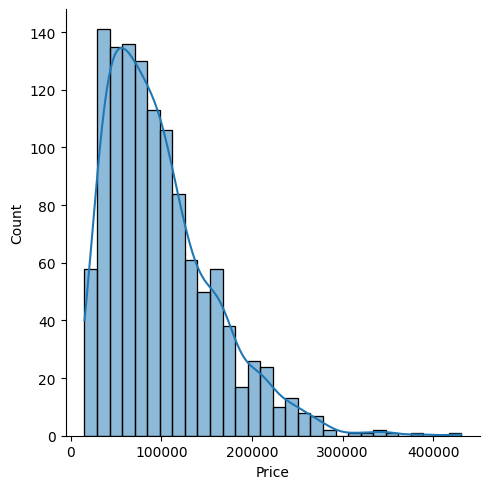

In [ ]:
sns.displot(x=df['Price'],kde=True)
plt.show()

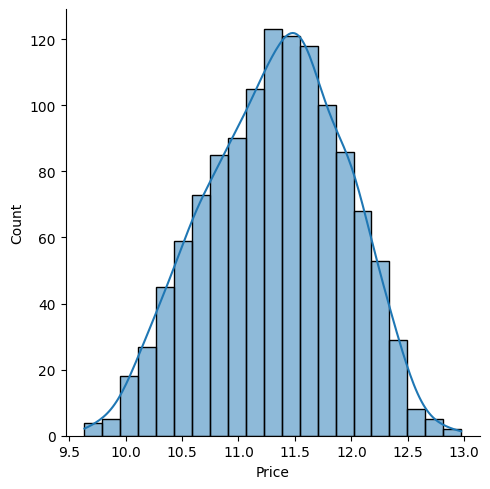

In [ ]:
sns.displot(x=np.log(df['Price']),kde=True)
plt.show()

In [ ]:
X=df.drop(columns=['Price'])
y=np.log(df['Price'])

In [ ]:
df.to_csv("laptop_data_processed.csv",index=False)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15,random_state=42)

In [ ]:
X.shape

(1224, 12)

In [ ]:
X_train.shape

(1040, 12)

In [ ]:
X_test.shape

(184, 12)

In [ ]:
0.85*1224

1040.3999999999999

In [ ]:
1224-1040

184

In [ ]:
X

,Company,TypeName,Ram,Gpu,OpSys,Weight,Touchscreen,IPS,CPU,HDD,SSD,PPI
0,Apple,Ultrabook,8,Intel,Mac OS,1.37,0,1,Intel Core i5,0,128,226.98
1,Apple,Ultrabook,8,Intel,Mac OS,1.34,0,0,Intel Core i5,0,0,127.68
2,HP,Notebook,8,Intel,No OS,1.86,0,0,Intel Core i5,0,256,141.21
3,Apple,Ultrabook,16,AMD,Mac OS,1.83,0,1,Intel Core i7,0,512,220.53
4,Apple,Ultrabook,8,Intel,Mac OS,1.37,0,1,Intel Core i5,0,256,226.98
...,...,...,...,...,...,...,...,...,...,...,...,...
1270,Lenovo,2 in 1 Convertible,4,Intel,Windows 10,1.80,1,1,Intel Core i7,0,128,157.35
1271,Lenovo,2 in 1 Convertible,16,Intel,Windows 10,1.30,1,1,Intel Core i7,0,512,276.05
1272,Lenovo,Notebook,2,Intel,Windows 10,1.50,0,0,Intel Celeron,0,0,111.94
1273,HP,Notebook,6,AMD,Windows 10,2.19,0,0,Intel Core i7,1000,0,100.45


In [ ]:
X_train

,Company,TypeName,Ram,Gpu,OpSys,Weight,Touchscreen,IPS,CPU,HDD,SSD,PPI
249,Apple,Ultrabook,8,Intel,Mac OS,1.37,0,1,Intel Core i5,0,512,226.98
453,Lenovo,Notebook,8,Intel,Windows 10,1.65,0,0,Intel Core i5,0,256,157.35
200,Dell,Gaming,16,Nvidia,Windows 10,2.65,0,1,Intel Core i7,1000,512,282.42
227,Asus,Notebook,8,Nvidia,Windows 10,2.00,0,0,Intel Core i5,0,256,141.21
189,Dell,Notebook,8,AMD,Windows 10,2.80,0,0,Intel Core i7,1000,128,127.34
...,...,...,...,...,...,...,...,...,...,...,...,...
1091,HP,Notebook,4,Intel,No OS,1.86,0,0,Intel Core i3,1000,0,100.45
1144,HP,2 in 1 Convertible,8,Intel,Windows 10,1.48,1,0,Intel Core i7,0,256,220.84
1179,HP,Notebook,4,Intel,Windows 10,2.07,0,0,Intel Core i3,500,0,100.45
903,Lenovo,Ultrabook,8,Intel,Windows 10,1.13,0,1,Intel Core i7,0,0,157.35


In [ ]:
y_train

249     12.097016
453     11.680455
200     11.996542
227     11.121393
189     11.465645
          ...    
1091    10.322691
1144    11.971299
1179    10.953277
903     12.101417
1175    11.121393
Name: Price, Length: 1040, dtype: float64

In [ ]:
X_test

,Company,TypeName,Ram,Gpu,OpSys,Weight,Touchscreen,IPS,CPU,HDD,SSD,PPI
691,Lenovo,Notebook,4,Intel,Windows 10,1.70,0,0,Intel Core i5,0,256,157.35
229,HP,Notebook,8,AMD,Windows 10,1.90,0,0,Intel Core i7,1000,0,141.21
158,Dell,2 in 1 Convertible,8,Intel,Windows 10,1.56,1,0,Intel Core i7,0,256,141.21
707,Lenovo,Workstation,16,Nvidia,Windows 7,2.18,0,0,Intel Core i7,0,512,141.21
956,Dell,2 in 1 Convertible,8,Intel,Windows 10,1.24,1,0,Intel Core i5,0,256,165.63
...,...,...,...,...,...,...,...,...,...,...,...,...
838,Lenovo,Notebook,4,Intel,Linux/Android/Chrome OS,1.50,0,0,Intel Celeron,0,0,111.94
637,Lenovo,Notebook,2,Intel,Windows 10,1.42,0,0,Intel Celeron,0,0,111.94
359,Dell,Notebook,8,Intel,Windows 10,1.36,0,0,Intel Core i5,0,256,157.35
1188,Dell,Ultrabook,8,Intel,Linux/Android/Chrome OS,1.23,1,0,Intel Core i5,0,256,276.05


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [ ]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

In [ ]:
# Label Encoding
# Feature Encoding:
    # - Ordinal Encoding
    # - One Hot Encoding

In [ ]:
X_train.sample()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Touchscreen,IPS,CPU,HDD,SSD,PPI
1109,Asus,Gaming,16,Nvidia,Windows 10,2.59,0,1,Intel Core i7,1000,128,141.21


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1040 entries, 249 to 1175
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1040 non-null   object 
 1   TypeName     1040 non-null   object 
 2   Ram          1040 non-null   int64  
 3   Gpu          1040 non-null   object 
 4   OpSys        1040 non-null   object 
 5   Weight       1040 non-null   float64
 6   Touchscreen  1040 non-null   int64  
 7   IPS          1040 non-null   int64  
 8   CPU          1040 non-null   object 
 9   HDD          1040 non-null   int64  
 10  SSD          1040 non-null   int64  
 11  PPI          1040 non-null   float64
dtypes: float64(2), int64(5), object(5)
memory usage: 105.6+ KB


In [ ]:
# LinearRegression
step1=ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,3,4,8])
    ],remainder='passthrough')
step2=LinearRegression()
pipe=Pipeline([('step1',step1),('step2',step2)])
pipe.fit(X_train,y_train)

y_pred=pipe.predict(X_test)
print("R2 score:",round(r2_score(y_test,y_pred),4))
print("MAE:",round(mean_absolute_error(y_test,y_pred),4))
print("MSE:",round(mean_squared_error(y_test,y_pred),4))

R2 score: 0.8122
MAE: 0.1963
MSE: 0.0593


In [ ]:
# LassoRegression
step1=ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,3,4,8])
    ],remainder='passthrough')
step2=Lasso(alpha=0.0001)
pipe=Pipeline([('step1',step1),('step2',step2)])
pipe.fit(X_train,y_train)

y_pred=pipe.predict(X_test)
print("R2 score:",round(r2_score(y_test,y_pred),4))
print("MAE:",round(mean_absolute_error(y_test,y_pred),4))
print("MSE:",round(mean_squared_error(y_test,y_pred),4))

R2 score: 0.8126
MAE: 0.1957
MSE: 0.0592


In [ ]:
# RidgeRegression
step1=ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,3,4,8])
    ],remainder='passthrough')
step2=Ridge(alpha=0.1)
pipe=Pipeline([('step1',step1),('step2',step2)])
pipe.fit(X_train,y_train)

y_pred=pipe.predict(X_test)
print("R2 score:",round(r2_score(y_test,y_pred),4))
print("MAE:",round(mean_absolute_error(y_test,y_pred),4))
print("MSE:",round(mean_squared_error(y_test,y_pred),4))

R2 score: 0.812
MAE: 0.1964
MSE: 0.0594


In [ ]:
# KNeighborsRegressor
step1=ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,3,4,8])
    ],remainder='passthrough')
step2=KNeighborsRegressor()
pipe=Pipeline([('step1',step1),('step2',step2)])
pipe.fit(X_train,y_train)

y_pred=pipe.predict(X_test)
print("R2 score:",round(r2_score(y_test,y_pred),4))
print("MAE:",round(mean_absolute_error(y_test,y_pred),4))
print("MSE:",round(mean_squared_error(y_test,y_pred),4))

R2 score: 0.763
MAE: 0.1998
MSE: 0.0748


In [ ]:
# DecisionTreeRegressor
step1=ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,3,4,8])
    ],remainder='passthrough')
step2=DecisionTreeRegressor(max_depth=8)
pipe=Pipeline([('step1',step1),('step2',step2)])
pipe.fit(X_train,y_train)

y_pred=pipe.predict(X_test)
print("R2 score:",round(r2_score(y_test,y_pred),4))
print("MAE:",round(mean_absolute_error(y_test,y_pred),4))
print("MSE:",round(mean_squared_error(y_test,y_pred),4))

R2 score: 0.8296
MAE: 0.177
MSE: 0.0538


In [ ]:
# Support Vector Regressor
step1=ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,3,4,8])
    ],remainder='passthrough')
step2=SVR(C=100000)
pipe=Pipeline([('step1',step1),('step2',step2)])
pipe.fit(X_train,y_train)

y_pred=pipe.predict(X_test)
print("R2 score:",round(r2_score(y_test,y_pred),4))
print("MAE:",round(mean_absolute_error(y_test,y_pred),4))
print("MSE:",round(mean_squared_error(y_test,y_pred),4))

R2 score: 0.774
MAE: 0.1867
MSE: 0.0714


In [ ]:
# AdaBoost Regressor
step1=ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,3,4,8])
    ],remainder='passthrough')
step2=AdaBoostRegressor()
pipe=Pipeline([('step1',step1),('step2',step2)])
pipe.fit(X_train,y_train)

y_pred=pipe.predict(X_test)
print("R2 score:",round(r2_score(y_test,y_pred),4))
print("MAE:",round(mean_absolute_error(y_test,y_pred),4))
print("MSE:",round(mean_squared_error(y_test,y_pred),4))

R2 score: 0.7982
MAE: 0.2021
MSE: 0.0637


In [ ]:
# Random Forest Regressor
step1=ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,3,4,8])
    ],remainder='passthrough')
step2=RandomForestRegressor()
pipe=Pipeline([('step1',step1),('step2',step2)])
pipe.fit(X_train,y_train)

y_pred=pipe.predict(X_test)
print("R2 score:",round(r2_score(y_test,y_pred),4))
print("MAE:",round(mean_absolute_error(y_test,y_pred),4))
print("MSE:",round(mean_squared_error(y_test,y_pred),4))

R2 score: 0.8738
MAE: 0.1531
MSE: 0.0398


In [ ]:
# eXtreme Gradient Boosting Regressor
step1=ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,3,4,8])
    ],remainder='passthrough')
step2=XGBRegressor()
pipe=Pipeline([('step1',step1),('step2',step2)])
pipe.fit(X_train,y_train)

y_pred=pipe.predict(X_test)
print("R2 score:",round(r2_score(y_test,y_pred),4))
print("MAE:",round(mean_absolute_error(y_test,y_pred),4))
print("MSE:",round(mean_squared_error(y_test,y_pred),4))

R2 score: 0.873
MAE: 0.147
MSE: 0.0401


In [ ]:
# Gradient Boosting Regressor
step1=ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,3,4,8])
    ],remainder='passthrough')
step2=GradientBoostingRegressor(n_estimators=500)
pipe=Pipeline([('step1',step1),('step2',step2)])
pipe.fit(X_train,y_train)

y_pred=pipe.predict(X_test)
print("R2 score:",round(r2_score(y_test,y_pred),4))
print("MAE:",round(mean_absolute_error(y_test,y_pred),4))
print("MSE:",round(mean_squared_error(y_test,y_pred),4))

R2 score: 0.8817
MAE: 0.145
MSE: 0.0373


In [ ]:
import pickle
pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))

In [ ]:
!pip install streamlit --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 27.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 23.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 55.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.2 MB/s eta 0:00:00


In [ ]:
%%writefile app.py
import streamlit as st
import pickle
import numpy as np

df=pickle.load(open('df.pkl','rb'))
pipe=pickle.load(open('pipe.pkl','rb'))

st.title("Laptop Price Predictor")
company=st.selectbox("Brand",df['Company'].unique(),index=4)
type=st.selectbox("Laptop Type",df['TypeName'].unique(),index=1)
ram=st.selectbox("RAM (in GB)",[2,4,6,8,12,16,24,32,64,128],index=3)
gpu=st.selectbox("GPU",df['Gpu'].unique(),index=0)
os=st.selectbox("Operating System",df['OpSys'].unique(),index=2)
weight=st.slider("Weight of the laptop(in kg)",min_value=0.65,max_value=5.0,value=2.0,step=0.5)
touchscreen=st.selectbox("Touchscreen",['Yes','No'],index=1)
ips=st.selectbox("IPS Display",["Yes","No"],index=0)
cpu=st.selectbox("Processor",df['CPU'].unique(),index=0)
hdd=st.selectbox("Hard drive size(in GB)(Select 0 if only SSD is present on the laptop)",
[0,128,256,512,1024,2048],index=0)
ssd=st.selectbox("SSD size(in GB)",[0,8,16,32,64,128,180,240,256,512,768,1024,2048],index=9)
screen_size=st.slider("Screen size(in inches)",min_value=10.0,max_value=18.5,value=15.6,step=0.1)
resolution=st.selectbox("Screen Resolution",
["2560x1600","1440x900","1920x1080","2880x1800","1366x768","2304x1440","3200x1800","1920x1200",
"2256x1504","3840x2160","2160x1440","2560x1440","1600x900","2736x1824","2400x1600"],index=2)

if st.button("PREDICT PRICE"):
    ppi=None
    if(touchscreen=="Yes"):
        touchscreen=1
    else:
        touchscreen=0
    if(ips=="Yes"):
        ips=1
    else:
        ips=0
    X_res=int(resolution.split('x')[0])
    Y_res=int(resolution.split('x')[1])
    ppi=((X_res**2)+(Y_res**2))**0.5/screen_size
    query=np.array([[company,type,ram,gpu,os,weight,touchscreen,ips,cpu,hdd,ssd,ppi]])
    op=np.exp(pipe.predict(query))
    st.subheader("The predicted price of the laptop with the above configuration is ₹"+str(round(op[0])))

Writing app.py


In [ ]:
X_train.sample()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Touchscreen,IPS,CPU,HDD,SSD,PPI
898,Dell,Notebook,4,AMD,Windows 10,2.18,0,0,Intel Core i3,1000,0,100.45


In [ ]:
df['SSD'].unique()

array([ 128,    0,  256,  512,   32,   64, 1000, 1024,   16,  768,  180,
        240,    8])

In [ ]:
!streamlit run app.py & npx localtunnel --port 8501



npx: installed 22 in 3.565s
your url is: https://yummy-olives-reply.loca.lt

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://35.233.160.77:8501

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
